In [1]:
# python peripherals
import random
import os
import sys
import math

# numpy
import numpy

# pandas
import pandas

# ipython
from IPython.display import display, HTML

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines

# pytorch
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SequentialSampler
from torch.utils.data import DataLoader

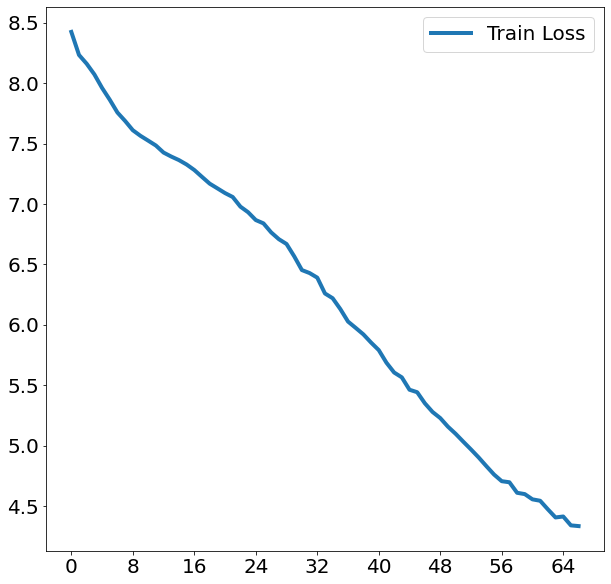

In [11]:
def list_subdirectories(base_dir='.'):
    result = []
    for current_sub_dir in os.listdir(base_dir):
        full_sub_dir_path = os.path.join(base_dir, current_sub_dir)
        if os.path.isdir(full_sub_dir_path):
            result.append(full_sub_dir_path)

    return result


def get_latest_subdirectory(base_dir='.'):
    subdirectories = list_subdirectories(base_dir)
    return os.path.normpath(max(subdirectories, key=os.path.getmtime))

latest_subdir = get_latest_subdirectory('./results')
results = numpy.load(f"{latest_subdir}/results.npy", allow_pickle=True).item()

epochs = results['epochs']
train_loss_array = results['train_epoch_loss_array'][1:]
epochs_list = numpy.array(range(len(train_loss_array)))

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.plot(epochs_list, train_loss_array, label='Train Loss', linewidth=4.0)

plt.legend(fontsize=20, title_fontsize=20)

plt.show()